### Data Science Job 
## Salaries of jobs in the Data Science domain
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?datasetId=2268489


In [1]:
import pandas as pd

In [3]:
dss = pd.read_csv('ds_salaries.csv')
dss.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
dss.value_counts(dss['work_year'])

work_year
2022    318
2021    217
2020     72
dtype: int64

In [7]:
dss.value_counts(dss['experience_level'])

experience_level
SE    280
MI    213
EN     88
EX     26
dtype: int64

In [8]:
dss.value_counts(dss['job_title'])

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist        

In [9]:
import matplotlib.pyplot as plt

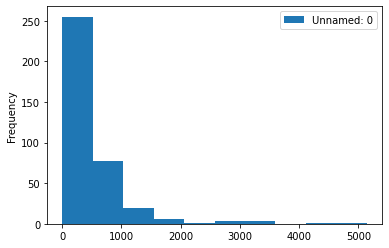

In [17]:
dss.groupby(['salary_in_usd']).sum().plot(kind='hist', y='Unnamed: 0')

In [ ]:
dss.loc[dss.value_counts(dss['job_title'])]

In [39]:
dss.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_prob
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,NaN
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,NaN
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,NaN
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,NaN
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,NaN


In [42]:
dss['job_prob'] = dss.groupby(['job_title'])['Unnamed: 0'].transform('count')
dss.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_prob
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,143
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,8
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,8
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,2
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,41


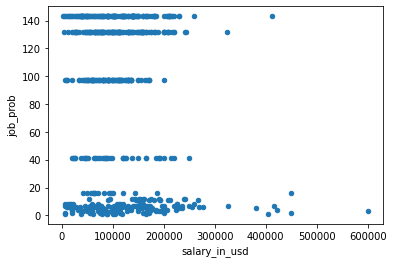

In [43]:
dss.plot(x="salary_in_usd", y="job_prob", kind="scatter")

In [3]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 2.7 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=2afef285d5c7c1aec2e4cd9e01af9493eba792f09e16946bf4bfc1444fd180cd
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country-converter


In [4]:
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

In [6]:
df = pd.read_csv('ds_salaries.csv')
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis=1, inplace=True)

In [7]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = 'Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
#                  textinfo = "label+value+percent parent+percent entry+percent root",
                 width=1000, height=500)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

In [8]:
top10_job_title = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [9]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [10]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='plotly_dark',
                    title = 'Employee Loaction Distribution Map')

fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()

In [11]:
remote_type = ['Fully Remote','Partially Remote','No Remote Work']

plt.figure(figsize=(20,5))
fig = px.bar(x = ['Fully Remote','Partially Remote','No Remote Work'], 
       y = df['remote_ratio'].value_counts().values,
       color = remote_type,
       color_discrete_sequence=px.colors.sequential.dense,
       text=df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution',
       template='plotly_dark')

fig.update_traces(width=0.4)

fig.data[0].marker.line.width = 2


fig.update_layout(
    xaxis_title="Remote Type",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<Figure size 1440x360 with 0 Axes>

In [12]:
exlevel_size = df.groupby(['experience_level','company_size']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_size['Entry-level/Junior'].index, y=exlevel_size['Entry-level/Junior'].values,
           text=exlevel_size['Entry-level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=exlevel_size['Executive-level/Director'].index, y=exlevel_size['Executive-level/Director'].values,
           text=exlevel_size['Executive-level/Director'].values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_size['Mid-level/Intermediate'].index, y=exlevel_size['Mid-level/Intermediate'].values,
           text=exlevel_size['Mid-level/Intermediate'].values, marker_color='yellow'),
    go.Bar(name='Senior-level/Expert', x=exlevel_size['Senior-level/Expert'].index, y=exlevel_size['Senior-level/Expert'].values,
           text=exlevel_size['Senior-level/Expert'].values, marker_color='blue'),
])
fig.update_layout(xaxis_tickangle=-45, title='Experience Level with Company Size', font=dict(family="Franklin Gothic", size=17), template='plotly_dark')

fig.show()

In [13]:
exlevel_salary = df[['experience_level','salary_in_usd']]

entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry-level/Junior']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive-level/Director']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'],mid_salary['salary_in_usd'],senior_salary['salary_in_usd'],executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']
colors = ['white','yellow','blue','red']

lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig2 = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='2. Mean Salary by Experience Level',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='1. Salary Distribution by Experience Level',font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.4)
fig2.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k) ",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

In [14]:
c_size = df[['company_size','salary_in_usd']]
small = exlevel_salary.loc[c_size['company_size']=='S']
mid = exlevel_salary.loc[c_size['company_size']=='M']
large = exlevel_salary.loc[c_size['company_size']=='L']
hist_data = [small['salary_in_usd'],mid['salary_in_usd'],large['salary_in_usd']]
group_labels = ['Company Size: Small','Company Size: Mid','Company Size: Large']
colors = ['white','red','blue']

lst = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

plt.figure(figsize=(20,5))
fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

fig2 = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='2. Mean Salary by Company Size',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='1. Salary Distribution by Company Size',font = dict(size=17,family="Franklin Gothic"))
fig2.update_traces(width=0.3)
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

<Figure size 1440x360 with 0 Axes>

In [15]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['job_title'],y=salary_job['salary_in_usd'],text = salary_job['salary_in_usd'], 
                   color = salary_job['salary_in_usd'], color_discrete_sequence=px.colors.sequential.PuBu)

fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Salaries ")
# fig.update_traces(width=0.9)
fig.update_layout(barmode = 'relative',xaxis_tickangle=-45, 
                  title='Top 20 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"))